In [42]:
import pandas as pd
import seaborn as sns
import category_encoders as ce
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/heart.zip')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Создадим признак, показывающий, человек старше 60 или нет
data['old'] = data['age'].apply(lambda age: int(float(age) > 60))
data['old'].sum()

79

In [16]:
def get_age_index(age):
    if age <= 20:
        age_index = 0
    elif 21 <= age <= 30:
        age_index = 1
    elif 31 <= age <= 40:
        age_index = 2
    elif 41 <= age <= 50:
        age_index = 3
    elif 51 <= age <= 60:
        age_index = 4
    elif age >= 61:
        age_index = 5
    return age_index

def trestbps_fill(age, sex):
    trest_bps_mean = {
        1: [123, 126, 129, 135, 142, 142],
        0: [116, 120, 127, 137, 144, 159]
    }
    age = get_age_index(age)
    
    return trest_bps_mean[sex][age]

data['trestbps_mean'] = data.apply(lambda x: trestbps_fill(x['age'], x['sex']), axis=1)
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,0,144


In [23]:
data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [41]:
oh_encoder = ce.OneHotEncoder()
oh_data = oh_encoder.fit_transform(data[['cp', 'restecg', 'slope', 'ca', 'thal']].astype('category'))
data = pd.concat([data, oh_data], axis=1)

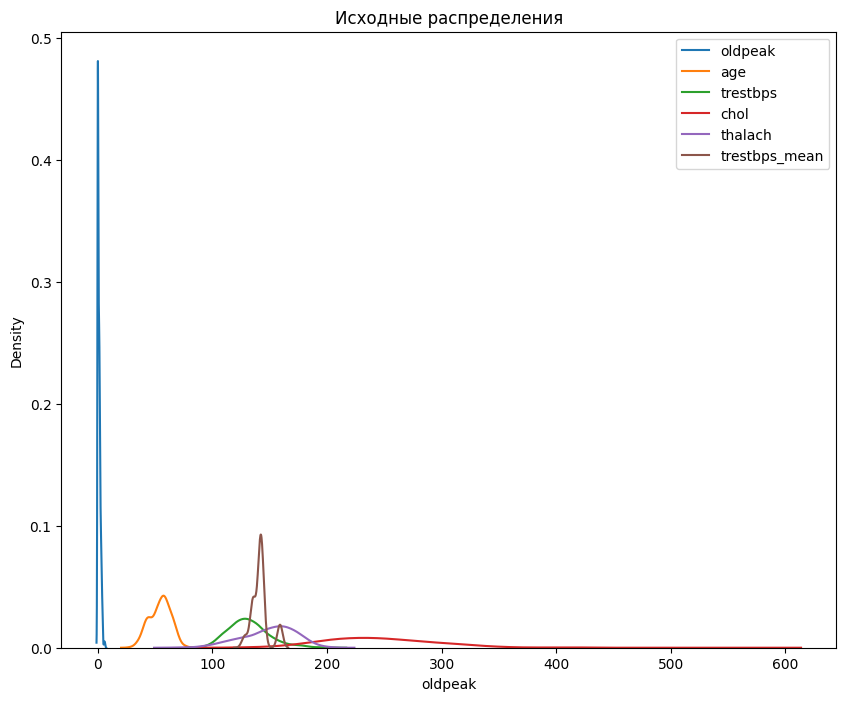

In [47]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

sns.kdeplot(data['oldpeak'], ax=ax1, label='oldpeak')
sns.kdeplot(data['age'], ax=ax1, label='age')
sns.kdeplot(data['trestbps'], ax=ax1, label='trestbps')
sns.kdeplot(data['chol'], ax=ax1, label='chol')
sns.kdeplot(data['thalach'], ax=ax1, label='thalach')
sns.kdeplot(data['trestbps_mean'], ax=ax1, label='trestbps_mean')

plt.legend()

In [50]:
rb_scaler = preprocessing.RobustScaler()
rb_data = rb_scaler.fit_transform(data[['age', 'oldpeak', 'trestbps', 'chol', 'thalach', 'trestbps_mean']])
rb_data = pd.DataFrame(rb_data, columns=data[['age', 'oldpeak', 'trestbps', 'chol', 'thalach', 'trestbps_mean']].columns)
rb_data

,age,oldpeak,trestbps,chol,thalach,trestbps_mean
0,0.592593,0.9375,0.75,-0.110236,-0.092308,0.0
1,-1.333333,1.6875,0.00,0.157480,1.046154,-2.6
2,-1.037037,0.3750,0.00,-0.566929,0.584615,-1.0
3,0.074074,0.0000,-0.50,-0.062992,0.769231,0.0
4,0.148148,-0.1250,-0.50,1.795276,0.307692,0.4
...,...,...,...,...,...,...
298,0.148148,-0.3750,0.50,0.015748,-0.923077,0.4
299,-0.740741,0.2500,-1.00,0.377953,-0.646154,-1.4
300,0.962963,1.6250,0.70,-0.740157,-0.369231,0.0
301,0.148148,0.2500,0.00,-1.716535,-1.169231,0.0


In [51]:
rb_data.describe()

,age,oldpeak,trestbps,chol,thalach,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,0.149752,0.081188,0.098646,-0.103173,-0.066007
std,0.672748,0.725672,0.876907,0.816232,0.704774,1.487564
min,-1.925926,-0.500000,-1.800000,-1.795276,-2.523077,-3.200000
25%,-0.555556,-0.500000,-0.500000,-0.456693,-0.600000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.500000,0.500000,0.543307,0.400000,0.000000
max,1.629630,3.375000,3.500000,5.102362,1.507692,3.400000


In [52]:
for rb_col in rb_data.columns:
    data[rb_col] = rb_data[rb_col]

In [53]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,0.592593,1,3,0.75,-0.110236,1,0,-0.092308,0,0.9375,...,0,1,0,0,0,0,1,0,0,0
1,-1.333333,1,2,0.00,0.157480,0,1,1.046154,0,1.6875,...,0,1,0,0,0,0,0,1,0,0
2,-1.037037,0,1,0.00,-0.566929,0,0,0.584615,0,0.3750,...,0,1,0,0,0,0,0,1,0,0
3,0.074074,1,1,-0.50,-0.062992,0,1,0.769231,0,0.0000,...,0,1,0,0,0,0,0,1,0,0
4,0.148148,0,0,-0.50,1.795276,0,1,0.307692,1,-0.1250,...,0,1,0,0,0,0,0,1,0,0


<AxesSubplot: >

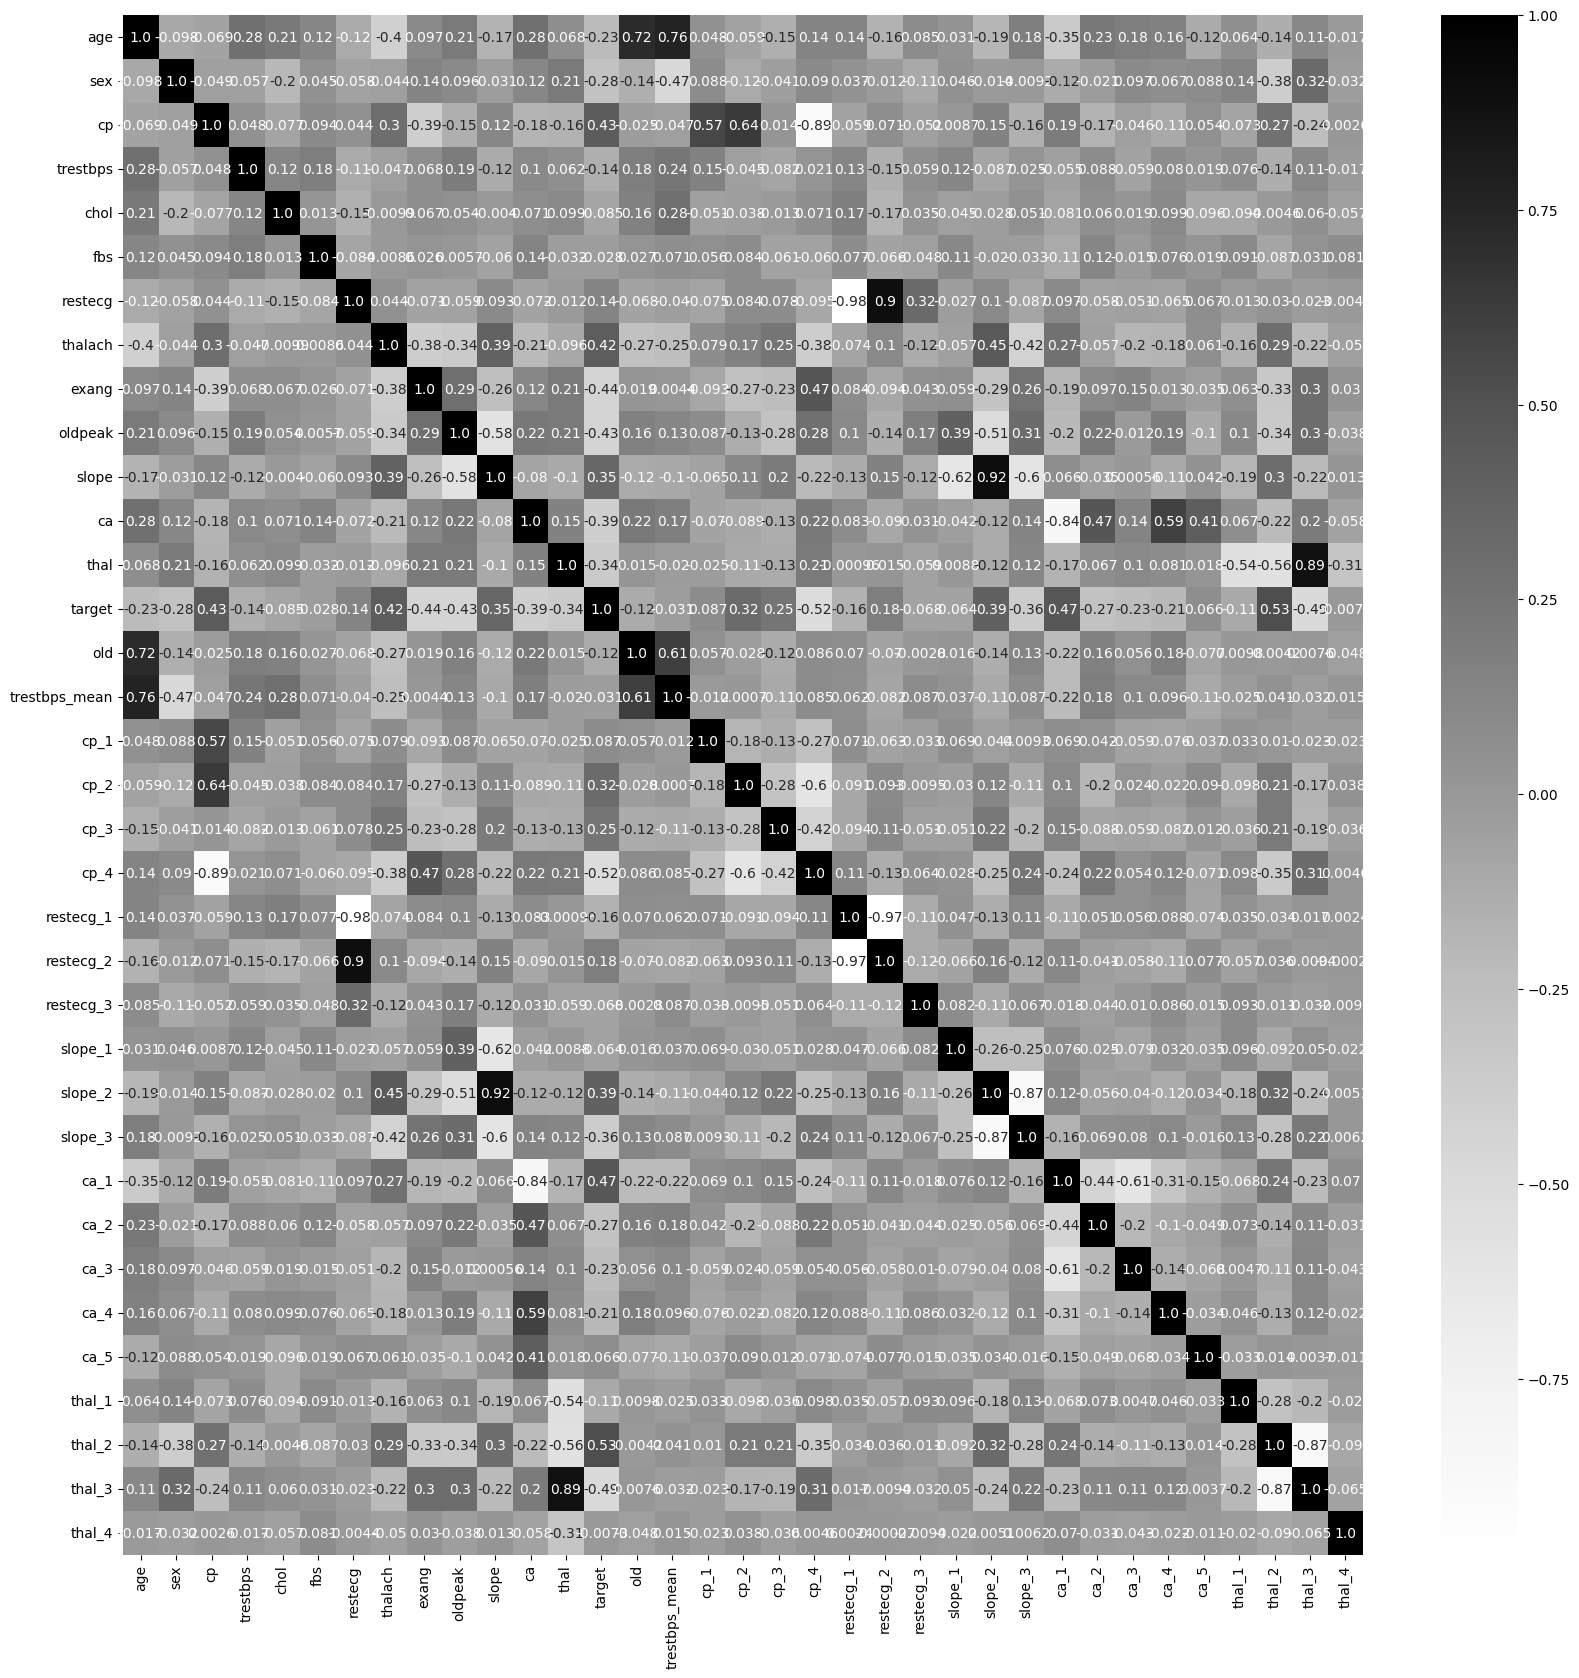

In [62]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, ax=ax1, fmt='.2', cmap='Greys')